## **Brief Overview**
#We have a list of 2728 D1 wrestlers accross 10 weight classes. We scraped all matches over their wrestling career which gave ~73,000 matches. Since we only wanted matches within the original list of 2728 D1 wrestlers, we filtered on the opponents. This gave us a final result of 23,472 matches between the wrestlers accross the original list.

In [ ]:
!pip install cssselect

In [ ]:
import requests
from lxml import html
from lxml import etree
from lxml.etree import tostring
import datetime
from io import StringIO
import numpy as np
import pandas as pd

#Get all links to wrestler profiles which contain all matches wrestled throughout career:

In [ ]:
import urllib
import lxml.html
from lxml.cssselect import CSSSelector
import time
import random
# These links contain the current wrestlers of each weight class. Their name is hyperlinked to their individual profile page.
urls = ["https://www.wrestlestat.com/rankings/weight/125","https://www.wrestlestat.com/rankings/weight/133",
        "https://www.wrestlestat.com/rankings/weight/141","https://www.wrestlestat.com/rankings/weight/149",
"https://www.wrestlestat.com/rankings/weight/157","https://www.wrestlestat.com/rankings/weight/165",
"https://www.wrestlestat.com/rankings/weight/174","https://www.wrestlestat.com/rankings/weight/184",
"https://www.wrestlestat.com/rankings/weight/197","https://www.wrestlestat.com/rankings/weight/285"]

# Go through the above URLs to get all hyperlinks within the page
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
all_links_by_weight = []
for i in urls:
  time.sleep(random.randint(0, 1))
  url = i
  headers={'User-Agent':user_agent,} 

  request=urllib.request.Request(url,None,headers) #The assembled request

  with urllib.request.urlopen(request) as connection:
    dom =  lxml.html.fromstring(connection.read())
    selAnchor = CSSSelector('a')
    foundElements = selAnchor(dom)
  all_links = [e.get('href') for e in foundElements]
  all_links_by_weight.append(all_links)

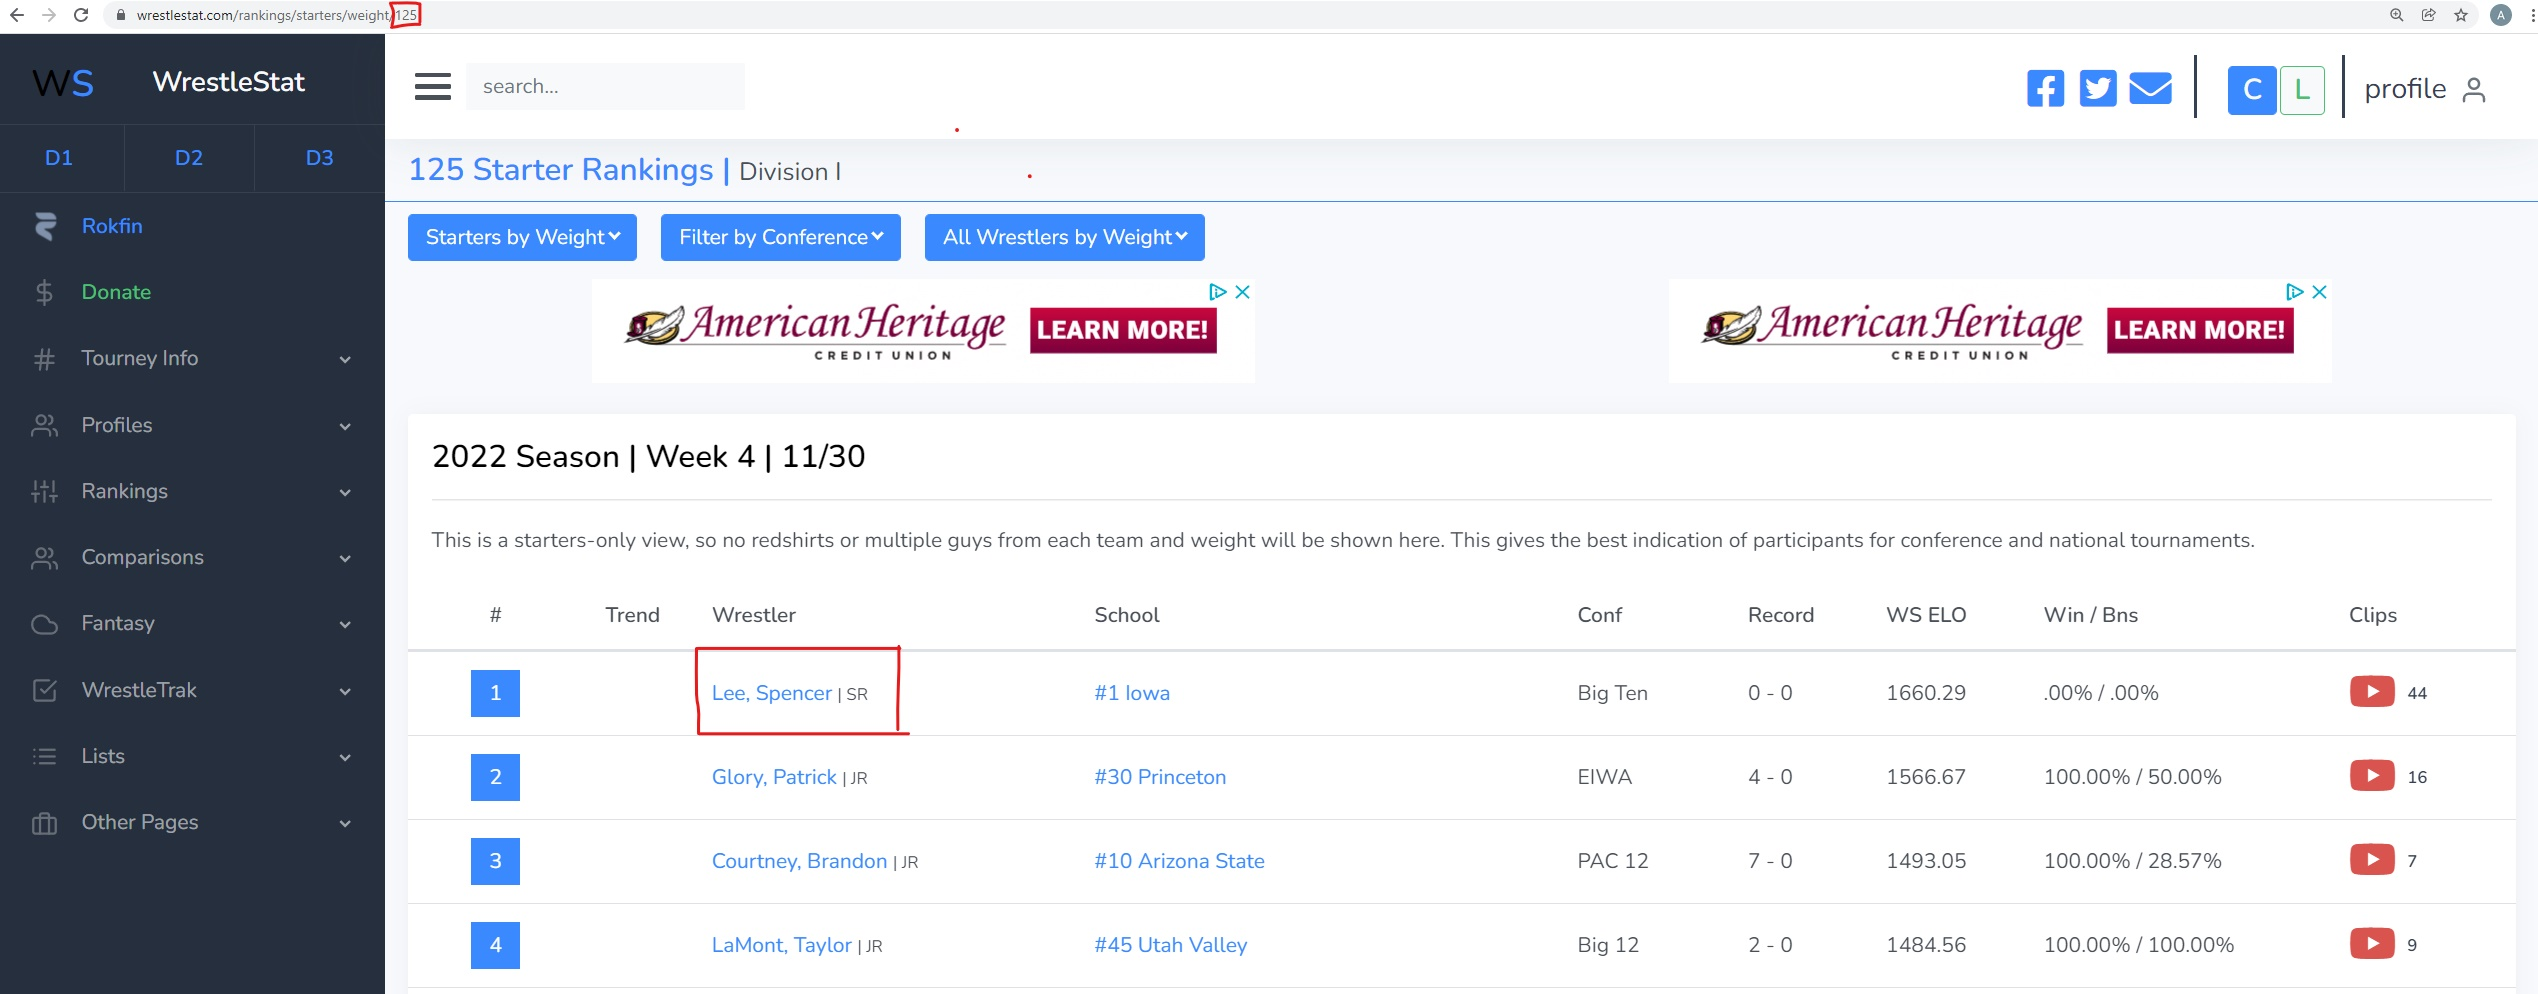

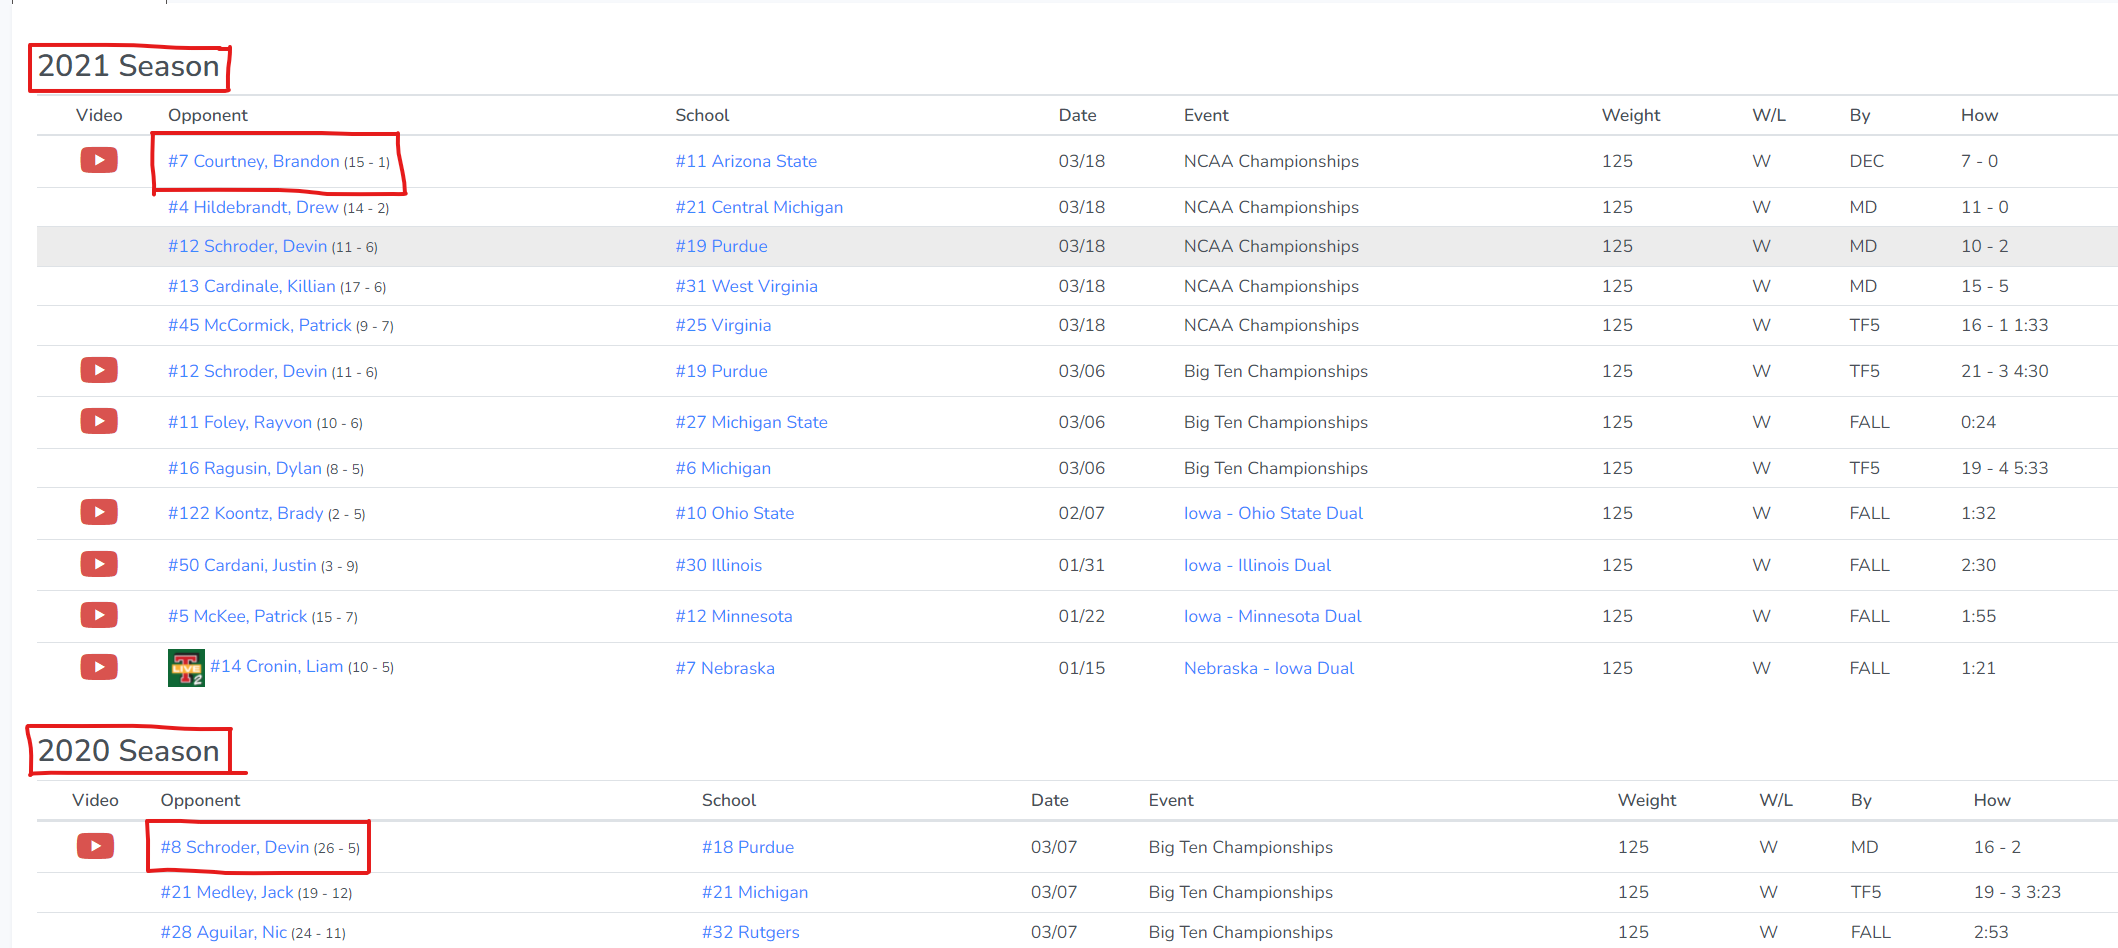

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Verify that links contain '/wrestle/' keyword which signifies it is a wrestler profile

In [ ]:
# Go through the URLs we pulled from the original 10 links, and keep the links which contain '/wrestler/', whhich is are the links to the wrestlers profiles
all_wrestler_link_by_weight = []
base_url = "https://www.wrestlestat.com"
s = '/wrestler/'
for i in range(0, len(all_links_by_weight)):
  only_wrestler_link = []
  for j in all_links_by_weight[i]:
    if s in str(j):
      only_wrestler_link.append(base_url + str(j))
  only_wrestler_link = only_wrestler_link[2:]
  only_wrestler_link = only_wrestler_link[:-1]
  all_wrestler_link_by_weight.append(only_wrestler_link)
for i in all_wrestler_link_by_weight:
  print(i)

['https://www.wrestlestat.com/wrestler/49146/lee-spencer/profile', 'https://www.wrestlestat.com/wrestler/44648/suriano-nick/profile', 'https://www.wrestlestat.com/wrestler/51100/glory-patrick/profile', 'https://www.wrestlestat.com/wrestler/44818/hildebrandt-drew/profile', 'https://www.wrestlestat.com/wrestler/50881/courtney-brandon/profile', 'https://www.wrestlestat.com/wrestler/44777/lamont-taylor/profile', 'https://www.wrestlestat.com/wrestler/50594/mckee-patrick/profile', 'https://www.wrestlestat.com/wrestler/44591/schroder-devin/profile', 'https://www.wrestlestat.com/wrestler/50655/camacho-jakob/profile', 'https://www.wrestlestat.com/wrestler/50909/lane-jaret/profile', 'https://www.wrestlestat.com/wrestler/52779/teske-brody/profile', 'https://www.wrestlestat.com/wrestler/57608/mastrogiovanni-trevor/profile', 'https://www.wrestlestat.com/wrestler/49268/cardinale-killian/profile', 'https://www.wrestlestat.com/wrestler/56007/deaugustino-michael/profile', 'https://www.wrestlestat.com/w

In [ ]:
# total number of wrestlers
counter = 0
for i in all_wrestler_link_by_weight:
  counter = counter + len(i)
print(counter)

2733


# Iterate through all the links and scrape desired attributes: wrestler name, opponent name, wrestler school, opponent school, type of score and tournament, outcome:

In [ ]:
full_wrestler_list = []
names_list = []
# The two outside for loops go through the links of the 2D array by weight class
for k in range(0, len(all_wrestler_link_by_weight)):
  for j in range(0, len(all_wrestler_link_by_weight[k])):

    # gets the URL of wrestler profile
    url = all_wrestler_link_by_weight[k][j]
    w = requests.get(url)
    dom_tree = html.fromstring(w.content)

    # We are getting the name of each profile from the URL because this will be used later to remove opponents who are not in the original list of current wrestlers
    split = url.split('/')
    names_list.append(split[5])
    name = [split[5]]

    year = []
    # Here we are going through the season which was wrestled on the page (2019, 2020, ect.)
    l = dom_tree.xpath('//*[@id="results"]/text()')
    for i in range(0, len(l)):
      a = dom_tree.xpath('//*[@id="results"]/div['+ str(i) +']/text()')
      # We are grabbing the year of which the opponents was wrestled as a feature as 'year' and getting the stats for that year
      if i % 2 == 1:
        year = dom_tree.xpath('//*[@id="results"]/div['+ str(i) +']/div/h2/text()')
      else:
        if i == 0:
          year = dom_tree.xpath('//*[@id="results"]/div['+ str(1) +']/div/h2/text()') #//*[@id="results"]/div[4]/div/div[1]/table/tbody
        stats = dom_tree.xpath('//*[@id="results"]/div['+ str(i) +']/div/div[1]/table/tbody/tr')
        # We are going through the matches for the corrosponding year
        for h in range(0, len(stats)):
          # To get the features (Opponent,	School,	Date,	Event,	Weight,	W/L,	By,	How) we need to scrape 3 different types of html depending on how it was displayed from the html text/hyperlink
          names1 = dom_tree.xpath('//*[@id="results"]/div['+ str(i) +']/div/div[1]/table/tbody/tr['+ str(h) +']/td/span/text()')
          names2 = dom_tree.xpath('//*[@id="results"]/div['+ str(i) +']/div/div[1]/table/tbody/tr['+ str(h) +']/td/a/text()')
          names3 = dom_tree.xpath('//*[@id="results"]/div['+ str(i) +']/div/div[1]/table/tbody/tr['+ str(h) +']/td/text()')
          arr = np.concatenate([year, name, names1, names2, names3])
          full_wrestler_list.append(arr)


In [ ]:
# Save the list of names
from google.colab import drive
drive.mount('/drive')
df_names = pd.DataFrame(names_list, columns=['names'])
df_names.to_csv('/drive/My Drive/names.cvs')


Mounted at /drive


In [ ]:
test_arry = full_wrestler_list

# Cleaning Data:

In [ ]:
test_arry = np.array(test_arry)
test_arry = np.array([row for row in test_arry if len(row)!=2])
test_arry = test_arry.tolist()
new_test = []
for i in test_arry:
  new_test.append(i.tolist())
# cleaning data, remove spaces and newline characters
clean_new_test = []
for i in new_test:
  b = list(filter(lambda a: a.strip(), i))

  clean_new_test.append(b)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
# save initial dataframe
from google.colab import drive
drive.mount('/drive')
df = pd.DataFrame(clean_new_test, columns=['year','wrestler', 'tournament', 'opponent','opponent_team','month_day', 'weight','outcome', 'type_of_win','score'])
df.to_csv('/drive/My Drive/not_clean_125.cvs')
df.head()

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


,year,wrestler,tournament,opponent,opponent_team,month_day,weight,outcome,type_of_win,score
0,2021 Season,lee-spencer,NCAA Championships,"#7 Courtney, Brandon",#11 Arizona State,03/18,125,W,DEC,7 - 0
1,2021 Season,lee-spencer,NCAA Championships,"#4 Hildebrandt, Drew",#21 Central Michigan,03/18,125,W,MD,11 - 0
2,2021 Season,lee-spencer,NCAA Championships,"#12 Schroder, Devin",#19 Purdue,03/18,125,W,MD,10 - 2
3,2021 Season,lee-spencer,NCAA Championships,"#13 Cardinale, Killian",#31 West Virginia,03/18,125,W,MD,15 - 5
4,2021 Season,lee-spencer,NCAA Championships,"#45 McCormick, Patrick",#25 Virginia,03/18,125,W,TF5,16 - 1 1:33


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/drive')
df = pd.read_csv('/drive/My Drive/not_clean_125.cvs')
from google.colab import drive
drive.mount('/drive')
df_names = []
df_names = pd.read_csv('/drive/My Drive/names.cvs')
names_list = df_names['names'].to_list()

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
# Some of the data scraped switched opponent, tournament, and opponent_team so reformat the incorrect rows
df_filtered = df[df['tournament'].str.contains(',')]
df = df.drop(df_filtered.index)

dic = {'tournament': 'opponent',
        'opponent': 'opponent_team',
        'opponent_team': 'tournament'}
  
# call rename () method
df_filtered.rename(columns=dic,
          inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# joining the frames back together after reformatting some of the entries
frames = [df, df_filtered]

cleaned_df = pd.concat(frames)
cleaned_df.head()

,Unnamed: 0,year,wrestler,tournament,opponent,opponent_team,month_day,weight,outcome,type_of_win,score
0,0,2021 Season,lee-spencer,NCAA Championships,"#7 Courtney, Brandon",#11 Arizona State,03/18,125,W,DEC,7 - 0
1,1,2021 Season,lee-spencer,NCAA Championships,"#4 Hildebrandt, Drew",#21 Central Michigan,03/18,125,W,MD,11 - 0
2,2,2021 Season,lee-spencer,NCAA Championships,"#12 Schroder, Devin",#19 Purdue,03/18,125,W,MD,10 - 2
3,3,2021 Season,lee-spencer,NCAA Championships,"#13 Cardinale, Killian",#31 West Virginia,03/18,125,W,MD,15 - 5
4,4,2021 Season,lee-spencer,NCAA Championships,"#45 McCormick, Patrick",#25 Virginia,03/18,125,W,TF5,16 - 1 1:33


In [ ]:
names_from_profiles = []
# split rank, last name, first name, and join only the last and first name back together
for i in cleaned_df['opponent']:
  names_from_profiles.append("".join(i.lower().split()[1:]))
structured_names = []
# Replace "-" with ',' from original list of names to match structure of opponent names
for i in names_list:
  structured_names.append(i.replace('-', ','))

In [ ]:
# Remove unranked wrestlers, which are not in orignal list
cleaned_df = cleaned_df[cleaned_df['opponent'].str.contains('#')]

In [ ]:
# join back the just first and last names back into 'opponent' column
cleaned_df['opponent'] = cleaned_df['opponent'].str.lower()
cleaned_df[['rank_of_opponent', 'last', 'first', 'drop1', 'drop2']] = cleaned_df['opponent'].str.split(' ', expand=True)
cleaned_df['opponent'] =  cleaned_df[['last', 'first']].apply(lambda row: ''.join(row.values.astype(str)), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
cleaned_df.drop(['last','first', 'drop1', 'drop2'],axis=1, inplace=True)

In [ ]:
# join on wrestlers in original list and opponents
df_opponents_in_list = pd.DataFrame(structured_names, columns=['opponent'])
result = pd.merge(cleaned_df, df_opponents_in_list, on=["opponent"]) 
result['wrestler'] = result['wrestler'].str.replace('-', ',')
result = result.rename(columns = {'win/lose':'outcome'})
result

,Unnamed: 0,year,wrestler,tournament,opponent,opponent_team,month_day,weight,outcome,type_of_win,score,rank_of_opponent
0,0,2021 Season,"lee,spencer",NCAA Championships,"courtney,brandon",#11 Arizona State,03/18,125,W,DEC,7 - 0,#7
1,458,2021 Season,"lamont,taylor",NCAA Championships,"courtney,brandon",#11 Arizona State,03/18,125,L,TB-1,2 - 1,#7
2,664,2020 Season,"schroder,devin",Cliff Keen Invitational,"courtney,brandon",#12 Arizona State,12/06,125,W,FALL,6:03,#14
3,765,2021 Season,"camacho,jakob",NCAA Championships,"courtney,brandon",#11 Arizona State,03/18,125,L,DEC,4 - 2,#7
4,1094,2020 Season,"deaugustino,michael",Cliff Keen Invitational,"courtney,brandon",#12 Arizona State,12/06,125,W,DEC,6 - 3,#14
...,...,...,...,...,...,...,...,...,...,...,...,...
14981,27212,2022 Season,"kanzler,christian",Chattanooga - Illinois Dual,"castillo,noah",#58 Chattanooga,12/11,149,L,DEC,6 - 4,#80
14982,29892,2022 Season,"stewart,garrett",Chattanooga - Davidson Dual,"castillo,noah",#58 Chattanooga,11/13,149,L,DEC,5 - 3,#80
14983,30522,2022 Season,"tyus,caleb",Chattanooga - Southern Illinois Edwardsville Dual,"castillo,noah",#58 Chattanooga,12/11,149,L,DEC,8 - 5,#80
14984,29091,2022 Season,"bright,brandon",Gardner-Webb - Virginia Tech Dual,"montgomery,kylan",#8 Virginia Tech,11/20,149,L,DEC,5 - 0,#147


In [ ]:
# Save current data in cleaning process
from google.colab import drive
drive.mount('/drive')
result.to_csv('/drive/My Drive/cleaned_opponents_in_d1.cvs')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/drive')
result = pd.read_csv('/drive/My Drive/cleaned_opponents_in_d1.cvs')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


# Remove certain score types and constructing values to be used for feature extraction. In wrestling a fall can occur at any point in the match. At this point the score of the matchis negated and the wrestler who earns the fall wins the match. Since we do not have scores for these matches that end in falls, we drop these instances.

In [ ]:
# casting the rank of opponent to into in order to be used as a feature and removing FALL from victory type
result['rank_of_opponent'] = result.rank_of_opponent.str.replace("#","")
result['rank_of_opponent'] = result['rank_of_opponent'].astype(str).astype(int)
result = result[result['type_of_win'] != 'FALL']
result = result.reset_index()

### Type of wins that occur in overtime (SV: sudden victory) should be classified as decsions. 

In [ ]:
# Remove victories that are due to forfeit or injury as these do not convey useful information
tos = ['DEC','FALL','MD','SV-1','SV-2','SV-3','TB-1','TB-2','TB-3','TF5']
w = ['149','174','197','125','285','184','141','133','165','157']
wl = ['L','W']
result = result[result['weight'].isin(w)]
result = result[result['type_of_win'].isin(tos)]
result = result[result['outcome'].isin(wl)]

result['outcome'] = result.outcome.map({'W':1, 'L':0})
result['type_of_win'] = result.type_of_win.map({'SV-1':'DEC','SV-2':'DEC','SV-3':'DEC','TB-1':'DEC','TB-2':'DEC','TB-3':'DEC', 'DEC':'DEC','TF5':'TF5','MD':'MD'})
result = result.reset_index()

In [ ]:
#Checking that we only have the desired victory types
s = set()
for i in range(0, len(result['wrestler'])):
  s.add(result['type_of_win'][i])
s

{'DEC', 'MD', 'TF5'}

# Ultimately we are trying to build a model that can classify a match by outcome (win/loss). Splitting the score column into score_for and score_against will help us build additional features down the road, such as average points scored, average points against, etc. 

In [ ]:
# splitting the score column into score against and score for later training
score_for = []
score_against = []
split_df = pd.DataFrame(result['score'].str.split(' ', expand=True))
result[['score_for','score_against']] = split_df[[0,2]]
for i in range(0, len(result['score_for'])):
  if result['outcome'][i] == 0:
    score_for.append(result['score_against'][i])
    score_against.append(result['score_for'][i])
  elif result['outcome'][i] == 1:
    score_against.append(result['score_against'][i])
    score_for.append(result['score_for'][i])
  else:
    print(result['outcome'][i])

result['score_for'] = score_for 

result['score_against'] = score_against


In [ ]:
# remove score as this is in a string format and not usable for modeling
result = result.drop(columns='score')

In [ ]:
# casting score to ints
result['score_against'] = result['score_against'].astype(str).astype(int)
result['score_for'] = result['score_for'].astype(str).astype(int)
result['score_difference'] =  result['score_for'] - result['score_against']


In [ ]:
# drop rows which the score column was not sucessfully expended into score_for and score_against
result = result.dropna()

In [ ]:
# one hot encoding type_of_win column more potentially useful features
result = pd.get_dummies(result, columns = ['type_of_win'])
result.head()

,level_0,index,Unnamed: 0,Unnamed: 0.1,year,wrestler,tournament,opponent,opponent_team,month_day,weight,outcome,rank_of_opponent,score_for,score_against,score_difference,type_of_win_DEC,type_of_win_MD,type_of_win_TF5
0,0,0,0,0,2021 Season,"lee,spencer",NCAA Championships,"courtney,brandon",#11 Arizona State,03/18,125,1,7,7,0,7,1,0,0
1,1,1,1,458,2021 Season,"lamont,taylor",NCAA Championships,"courtney,brandon",#11 Arizona State,03/18,125,0,7,1,2,-1,1,0,0
2,2,3,3,765,2021 Season,"camacho,jakob",NCAA Championships,"courtney,brandon",#11 Arizona State,03/18,125,0,7,2,4,-2,1,0,0
3,3,4,4,1094,2020 Season,"deaugustino,michael",Cliff Keen Invitational,"courtney,brandon",#12 Arizona State,12/06,125,1,14,6,3,3,1,0,0
4,4,5,5,1101,2019 Season,"deaugustino,michael",Midlands Championships,"courtney,brandon",#21 Arizona State,12/29,125,0,40,3,10,-7,1,0,0


In [ ]:
result.drop(['level_0','index','Unnamed: 0'], axis=1, inplace=True)
result.reset_index(inplace=True)

In [ ]:
# take all wrestlers listed and calculate their total victories and types of wins accross all matches
dic = {x: {'wrestler_losses':0,'wrestler_wins':0,'wrestler_dec':0,'wrestler_tech':0,'wrestler_total_matches':0,'wrestler_total_points_against':0,'wrestler_total_points_for':0, 'wrestler_major':0} for x in result['wrestler']}
for i in range(0, len(result['wrestler'])):
  dic[result['wrestler'][i]]['wrestler_total_points_against'] += result['score_against'][i]
  dic[result['wrestler'][i]]['wrestler_total_points_for'] += result['score_for'][i]
  dic[result['wrestler'][i]]['wrestler_total_matches'] += 1
  if result['outcome'][i] == 1:
    dec = result['type_of_win_DEC'][i]
    tech = result['type_of_win_TF5'][i]
    MD = result['type_of_win_MD'][i]
    dic[result['wrestler'][i]]['wrestler_wins'] += 1
    dic[result['wrestler'][i]]['wrestler_tech'] += tech
    dic[result['wrestler'][i]]['wrestler_dec'] += dec
    dic[result['wrestler'][i]]['wrestler_major'] += MD
  else:
    dic[result['wrestler'][i]]['wrestler_losses'] += 1
  
df_ind = pd.DataFrame(dic)
df_ind

,"lee,spencer","lamont,taylor","camacho,jakob","deaugustino,michael","barnett,eric","kaylor,brandon","medley,jack","mauger,kase","curry,gage","bayless,beau","moran,jacob","meink,korbin","lorenzo,antonio","cardani,justin","roes,micah","ferri,jake","rodriguez,lucas","svihel,jake","stacey,darrick","naquin,ty","disario,jackson","melendez,joey","schroder,devin","teske,brody","heinselman,malik","prata,joey","punke,dack","garcia,brendon","carson,jayden","mccormick,patrick","flores,eddie","paetzell,brandon","mattin,drew","valdiviez,cameron","martinez,benjamin","mckee,patrick","cardinale,killian","surtin,noah","latona,sam","cronin,liam",...,"glynos,michael","pace,andrew","simon,riley","barrett,ethan","bancroft,ben","sitek,callum","decker,parker","mylin,joel","woods,colton","voinovich,victor","carr,payne","ferguson,cole","ohl,amonn","bianchi,matt","manion,cade","troy,kavan","wang,sean","loving,marcus","george,antonio","walls,preston","molloy,jack","jimenez,sebastian","price,calum","feite,paul","wright,jacob","hammond,maxwell","torres,ricky","gleason,evan","mcgill,cole","venosa,micheal","hansen,grant","frack,noah","granger,ryan","mastrogiovanni,travis","loera,anthony","shindel,eric","rotkvich,zack","hansen,cole","mattin,zack","clark,evan"
wrestler_losses,2,7,6,15,12,13,30,1,16,10,8,15,12,20,4,22,21,11,10,2,12,9,17,7,22,15,14,9,11,14,11,7,15,9,23,11,20,9,6,27,...,1,0,0,0,2,0,1,1,2,0,1,0,1,1,2,2,0,2,1,0,2,1,2,1,5,1,0,1,1,1,1,0,2,0,1,2,1,1,0,1
wrestler_wins,23,24,32,24,19,21,26,3,38,14,11,21,9,20,8,29,10,6,0,0,19,9,39,10,36,23,12,3,7,18,4,19,20,5,4,22,29,11,21,26,...,0,1,1,1,0,2,0,0,2,2,1,2,0,0,0,0,1,0,0,1,0,0,0,0,2,1,1,0,0,0,0,1,1,1,0,1,0,1,1,0
wrestler_dec,5,16,17,24,11,11,21,2,32,10,8,14,6,18,6,15,9,6,0,0,13,8,21,8,32,21,10,2,4,14,3,13,16,2,4,17,24,7,13,19,...,0,1,1,1,0,2,0,0,1,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,2,1,1,0,0,0,0,1,1,1,0,1,0,0,1,0
wrestler_tech,13,5,3,0,1,1,3,0,2,0,1,0,1,0,0,4,0,0,0,0,3,0,11,2,1,0,2,1,2,1,0,3,1,1,0,0,0,3,0,4,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
wrestler_total_matches,25,31,38,39,31,34,56,4,54,24,19,36,21,40,12,51,31,17,10,2,31,18,56,17,58,38,26,12,18,32,15,26,35,14,27,33,49,20,27,53,...,1,1,1,1,2,2,1,1,4,2,2,2,1,1,2,2,1,2,1,1,2,1,2,1,7,2,1,1,1,1,1,1,3,1,1,3,1,2,1,1
wrestler_total_points_against,48,136,175,140,140,216,291,29,225,93,107,203,110,180,68,326,295,129,90,38,156,97,226,94,315,138,103,75,149,151,110,117,160,100,279,180,265,108,104,331,...,11,5,2,4,26,0,7,9,14,4,7,7,17,6,18,29,0,27,9,2,37,8,34,6,41,23,4,6,8,4,10,0,29,0,10,23,6,6,3,9
wrestler_total_points_for,335,267,381,154,210,279,326,40,320,127,116,229,109,157,84,415,122,95,27,4,207,92,416,101,348,143,110,55,130,179,66,185,197,97,58,233,285,146,199,358,...,0,8,3,6,7,5,3,3,20,27,12,15,7,5,4,7,10,3,3,9,6,5,0,5,20,8,6,1,0,0,3,2,11,5,2,15,2,16,10,0
wrestler_major,5,3,12,0,7,9,2,1,4,4,2,7,2,2,2,10,1,0,0,0,3,1,7,0,3,2,0,0,1,3,1,3,3,2,0,5,5,1,8,3,...,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# add ranks of wrestler to a dataframe
dic = {x: {'wrestler_rank':0} for x in result['opponent']}
for i in range(0, len(result['wrestler'])):
  dic[result['opponent'][i]]['wrestler_rank'] = result['rank_of_opponent'][i]
rank_df = pd.DataFrame(dic).transpose()

rank_df.reset_index(inplace=True)
rank_df = rank_df.rename(columns = {'index':'wrestler'})

In [ ]:
df_ind = df_ind.transpose()
df_ind = df_ind.rename(columns = {'index':'wrestler'})

In [ ]:
df_ind = df_ind.reset_index()

In [ ]:
# drop these because they cannot be used as features as they are the result of the match wrestled
result.drop(['type_of_win_DEC',	'type_of_win_TF5', 'type_of_win_MD'], axis=1, inplace=True)

In [ ]:
df_ind = df_ind.rename(columns = {'index':'wrestler'})

In [ ]:
# Use the newly calulated statistics to join onto wrestler
merged = pd.merge(result, df_ind, on="wrestler")

In [ ]:
# Rename wrestler to opponents and join onto opponets to get the same statistics for opponent
dic = {'wrestler': 'opponent',
        'wrestler_losses': 'opponent_losses',
        'wrestler_wins': 'opponent_wins',
       'wrestler_dec': 'opponent_dec',
       'wrestler_tech': 'opponent_tech',
       'wrestler_major': 'opponent_major',
       'wrestler_total_matches': 'opponent_total_matches',
       'wrestler_total_points_against': 'opponent_total_points_against',
       'wrestler_total_points_for': 'opponent_total_points_for'}
# call rename() method
df_ind.rename(columns=dic,
          inplace=True)
merged = pd.merge(merged, df_ind, on="opponent")

In [ ]:
# Add ranks to wrestler
merged = pd.merge(merged, rank_df, on="wrestler")

In [ ]:
# Calculate averages for points scored for and points scored against for wrestler and opponent
merged['wrestler_average_points_for'] = merged['wrestler_total_points_for'] / merged['wrestler_total_matches']
merged['wrestler_average_points_against'] = merged['wrestler_total_points_against'] / merged['wrestler_total_matches']
merged['opponent_average_points_for'] = merged['opponent_total_points_for'] / merged['opponent_total_matches']
merged['opponent_average_points_against'] = merged['opponent_total_points_against'] / merged['opponent_total_matches']
merged['wrestler_win_pct'] = merged['wrestler_wins'] / merged['wrestler_total_matches']
merged['opponent_win_pct'] = merged['opponent_wins'] / merged['opponent_total_matches']

merged = merged[merged['wrestler_total_matches'] > 10]
merged.head()

,index,Unnamed: 0.1,year,wrestler,tournament,opponent,opponent_team,month_day,weight,outcome,rank_of_opponent,score_for,score_against,score_difference,wrestler_losses,wrestler_wins,wrestler_dec,wrestler_tech,wrestler_total_matches,wrestler_total_points_against,wrestler_total_points_for,wrestler_major,opponent_losses,opponent_wins,opponent_dec,opponent_tech,opponent_total_matches,opponent_total_points_against,opponent_total_points_for,opponent_major,wrestler_rank,wrestler_average_points_for,wrestler_average_points_against,opponent_average_points_for,opponent_average_points_against,wrestler_win_pct,opponent_win_pct
0,0,0,2021 Season,"lee,spencer",NCAA Championships,"courtney,brandon",#11 Arizona State,03/18,125,1,7,7,0,7,2,23,5,13,25,48,335,5,8,37,21,5,45,219,456,11,1,13.4,1.92,10.133333,4.866667,0.92,0.822222
1,43,1,2021 Season,"lee,spencer",NCAA Championships,"hildebrandt,drew",#21 Central Michigan,03/18,125,1,4,11,0,11,2,23,5,13,25,48,335,5,20,45,35,1,65,212,343,9,1,13.4,1.92,5.276923,3.261538,0.92,0.692308
2,44,50,2019 Season,"lee,spencer",Midlands Championships,"hildebrandt,drew",#39 Central Michigan,12/29,125,1,21,18,0,18,2,23,5,13,25,48,335,5,20,45,35,1,65,212,343,9,1,13.4,1.92,5.276923,3.261538,0.92,0.692308
3,110,2,2021 Season,"lee,spencer",NCAA Championships,"schroder,devin",#19 Purdue,03/18,125,1,12,10,2,8,2,23,5,13,25,48,335,5,17,39,21,11,56,226,416,7,1,13.4,1.92,7.428571,4.035714,0.92,0.696429
4,111,5,2021 Season,"lee,spencer",Big Ten Championships,"schroder,devin",#19 Purdue,03/06,125,1,12,21,3,18,2,23,5,13,25,48,335,5,17,39,21,11,56,226,416,7,1,13.4,1.92,7.428571,4.035714,0.92,0.696429


# Modeling:
We wanted to apply different opproaches to modeling, we decided to experiment with a few kinds of models. We used a ridge regression model to calculate both score_for and score_against. We also used a feed forward neural network multilayer perceptron (MLP), to predict both score for and score against. We used a bagging regressor to predict the score difference. We also used a tree based ensemble model for classifying a binary outcome of the match.

In [ ]:
from  sklearn.model_selection  import  train_test_split
from  sklearn.ensemble  import  RandomForestRegressor
from  sklearn.metrics  import  mean_squared_error, accuracy_score
from  xgboost  import  XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression


X = merged[['rank_of_opponent','wrestler_losses','wrestler_wins','wrestler_dec',
                         'wrestler_dec','wrestler_tech','opponent_losses',
                         'opponent_wins','opponent_dec','opponent_tech','wrestler_rank',
                         'wrestler_average_points_for','wrestler_average_points_against',
                         'opponent_average_points_for','opponent_average_points_against']]
y = merged[['score_for','score_against']]


# EDA: Correlation Matrix

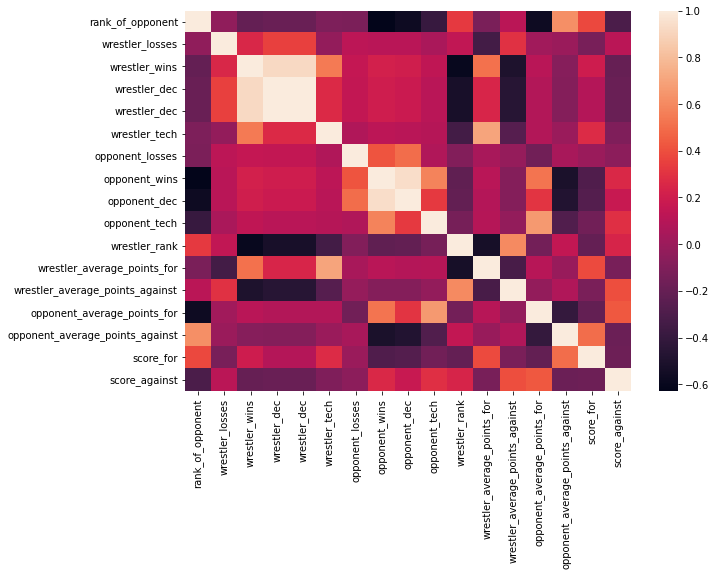

In [ ]:
import seaborn as sns
df = merged[['rank_of_opponent','wrestler_losses','wrestler_wins','wrestler_dec',
                         'wrestler_dec','wrestler_tech','opponent_losses',
                         'opponent_wins','opponent_dec','opponent_tech','wrestler_rank',
                         'wrestler_average_points_for','wrestler_average_points_against',
                         'opponent_average_points_for','opponent_average_points_against',
             'score_for','score_against']]
f, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(df.corr())

### In this next piece we perform PCA on the 15 features above. With Principal Component Analysis (PCA) we can remove some of the multicollinearity in our features and keep the components that are contributing the most to our variance. 

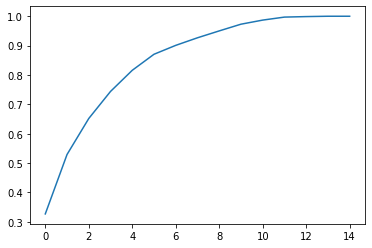

In [ ]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y,
                               test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA()
X_train_2 = pca.fit_transform(X_train)
X_test_2 = pca.transform(X_test)

pc_vs_variance = np.cumsum(pca.explained_variance_ratio_)

pc_vs_variance
plt.plot(pc_vs_variance)


In [ ]:
regressor = Ridge(alpha=1)
regressor.fit(X_train_2, y_train.to_numpy())
y_pred = regressor.predict(X_test_2)
mean_squared_error(y_pred, y_test)

12.378475379446911

In [ ]:
outcome_pred = [1 if x[0] > x[1] else 0 for x in y_pred]
outcome_real = [1 if x[0] > x[1] else 0 for x in y_test.to_numpy()]
accuracy_score(outcome_real, outcome_pred)

0.7791864764923402

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[656 201]
 [217 819]]


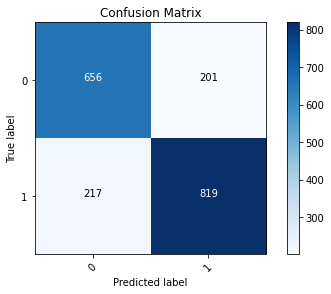

In [ ]:
cnf_matrix = confusion_matrix(outcome_real, outcome_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],
                      title='Confusion Matrix')
plt.show()

In [ ]:
X = merged[['rank_of_opponent','wrestler_rank', 'wrestler_tech','opponent_tech', 'wrestler_average_points_for','wrestler_average_points_against','opponent_average_points_for',	'opponent_average_points_against']]
y = merged['score_difference']


X_train, X_test, y_train, y_test = train_test_split(X, y,
                               test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
from sklearn import pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from datetime import datetime
from mlxtend.regressor import StackingCVRegressor
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def rmsle(y_train, y_pred):
    return np.sqrt(mean_squared_error(X_test, y_pred))

def cv_rmse(model, X=X_train):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

ridge = make_pipeline(RobustScaler(), RidgeCV(cv=kfolds))
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, random_state=42, cv=kfolds))
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, cv=kfolds))                                
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =42) 

lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )

xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, gbr, xgboost, lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [ ]:
score = cv_rmse(ridge , X_train)
score = cv_rmse(lasso , X_train)
print("LASSO: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(elasticnet)
print("elastic net: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lightgbm)
print("lightgbm: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(gbr)
print("gbr: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

LASSO: 4.7611 (0.1379)
 2021-12-16 03:01:28.613430
elastic net: 4.7612 (0.1374)
 2021-12-16 03:01:31.364834
SVR: 4.8099 (0.1276)
 2021-12-16 03:02:05.035212
lightgbm: 4.8261 (0.1400)
 2021-12-16 03:02:28.991157


In [ ]:
stack_gen_model = stack_gen.fit(np.array(X_train), np.array(y_train))

elastic_model_full_data = elasticnet.fit(X_train, y_train)

lasso_model_full_data = lasso.fit(X_train, y_train)

ridge_model_full_data = ridge.fit(X_train, y_train)

svr_model_full_data = svr.fit(X_train, y_train)

gbr_model_full_data = gbr.fit(X_train, y_train)

xgb_model_full_data = xgboost.fit(X_train, y_train)

lgb_model_full_data = lightgbm.fit(X_train, y_train)

In [ ]:
def blend_models_predict(X_test):
    return ((0.1 * elastic_model_full_data.predict(X_test)) + 
            (0.05 * lasso_model_full_data.predict(X_test)) + 
            (0.1 * ridge_model_full_data.predict(X_test)) + 
            (0.1 * svr_model_full_data.predict(X_test)) + 
            (0.1 * gbr_model_full_data.predict(X_test)) + 
            (0.15 * xgb_model_full_data.predict(X_test)) + 
            (0.1 * lgb_model_full_data.predict(X_test)) + 
            (0.3 * stack_gen_model.predict(np.array(X_test))))
    


In [ ]:
from sklearn.metrics import mean_squared_error
pred = blend_models_predict(X_test)
mean_squared_error(y_test, pred)

In [ ]:
outcome_pred = [1 if x > 0 else 0 for x in pred]
outcome_real = [1 if x > 0 else 0 for x in y_test.to_numpy()]
accuracy_score(outcome_real, outcome_pred)

Confusion matrix, without normalization
[[656 201]
 [217 819]]


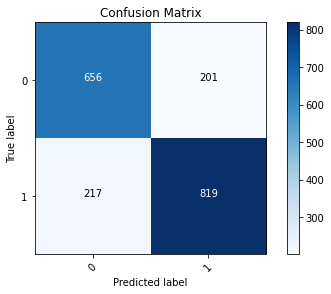

In [ ]:
cnf_matrix = confusion_matrix(outcome_real, outcome_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],
                      title='Confusion Matrix')
plt.show()

In [ ]:
X_full = merged[['rank_of_opponent','wrestler_losses','wrestler_wins','wrestler_dec',
                         'wrestler_dec','wrestler_tech','opponent_losses',
                         'opponent_wins','opponent_dec','opponent_tech','wrestler_rank',
                         'wrestler_average_points_for','wrestler_average_points_against',
                         'opponent_average_points_for','opponent_average_points_against']]
y_full = merged[['score_for','score_against']]


X_train, X_test, y_train, y_test = train_test_split(X_full, y_full,
                               test_size=0.2, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
def evaluate_model(X=X_train, y=y_train):
	results = list()
	n_inputs, n_outputs = X.shape[1], y.shape[1]
	# define evaluation procedure
	cv = RepeatedKFold(n_splits=8, n_repeats=2, random_state=1)
	# enumerate folds
	for train_ix, test_ix in cv.split(X):
		# prepare data
		X_train, X_test = X[train_ix], X[test_ix]
		y_train, y_test = y[train_ix], y[test_ix]
		# define model
		model = get_model(n_inputs, n_outputs)
		# fit model
		model.fit(X_train, y_train, verbose=0, epochs=100)
		# evaluate model on test set
		mae = model.evaluate(X_test, y_test, verbose=0)
		# store result
		print('>%.3f' % mae)
		results.append(mae)
	return results

In [ ]:

# mlp for multi-output regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
 
# get the dataset
def get_dataset():
	return X_train, y_train
 
# get the model
def get_model(n_inputs, n_outputs):
	model = Sequential()
	model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
	model.add(Dense(n_outputs, kernel_initializer='he_uniform'))
	model.compile(loss='mae', optimizer='adam')
	return model
 
# evaluate a model using repeated k-fold cross-validation

X, y = get_dataset()
n_inputs, n_outputs = X.shape[1], y.shape[1]
model = get_model(n_inputs, n_outputs)
model.fit(X, y, verbose=0, epochs=100)

In [ ]:
# use mlp for prediction on multi-output regression
from numpy import asarray
newX = asarray(X_test)
yhat = model.predict(newX)

In [ ]:
from sklearn.metrics import accuracy_score
mean_squared_error(y_test, yhat)

In [ ]:
outcome_pred = [1 if x[0] > x[1] else 0 for x in yhat]
outcome_real = [1 if x[0] > x[1] else 0 for x in y_test.to_numpy()]
accuracy_score(outcome_real, outcome_pred)

In [ ]:
cnf_matrix = confusion_matrix(outcome_real, outcome_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],
                      title='Confusion Matrix')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
features = merged[['rank_of_opponent','wrestler_losses','wrestler_wins','wrestler_dec',
                         'wrestler_dec','wrestler_tech','opponent_losses',
                         'opponent_wins','opponent_dec','opponent_tech','wrestler_rank',
                         'wrestler_average_points_for','wrestler_average_points_against',
                         'opponent_average_points_for','opponent_average_points_against']]
labels = merged[['outcome']]
x_train_cfcn, x_test_cfcn, y_train_cfcn, y_test_cfcn = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
# dimensionality reduction using PCA 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(x_train_cfcn)

pca = PCA()
X2 = pca.fit_transform(X_train)

pc_vs_variance = np.cumsum(pca.explained_variance_ratio_)

pc_vs_variance
plt.plot(pc_vs_variance)

In [ ]:
merged.to_csv('/drive/My Drive/merged.cvs')


In [ ]:
!pip install pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('matchdf').getOrCreate()
sparkMerged = spark.read.csv('/drive/My Drive/merged.cvs', inferSchema = True, header = True)
sparkMerged.printSchema()
sparkMerged.show()

root
 |-- _c0: integer (nullable = true)
 |-- index: integer (nullable = true)
 |-- Unnamed: 0.1: integer (nullable = true)
 |-- year: string (nullable = true)
 |-- wrestler: string (nullable = true)
 |-- tournament: string (nullable = true)
 |-- opponent: string (nullable = true)
 |-- opponent_team: string (nullable = true)
 |-- month_day: string (nullable = true)
 |-- weight: integer (nullable = true)
 |-- outcome: integer (nullable = true)
 |-- rank_of_opponent: integer (nullable = true)
 |-- score_for: integer (nullable = true)
 |-- score_against: integer (nullable = true)
 |-- score_difference: integer (nullable = true)
 |-- wrestler_losses: integer (nullable = true)
 |-- wrestler_wins: integer (nullable = true)
 |-- wrestler_dec: integer (nullable = true)
 |-- wrestler_tech: integer (nullable = true)
 |-- wrestler_total_matches: integer (nullable = true)
 |-- wrestler_total_points_against: integer (nullable = true)
 |-- wrestler_total_points_for: integer (nullable = true)
 |-- wr

In [ ]:
from pyspark.ml.feature import VectorAssembler
numericCols = ['rank_of_opponent','wrestler_losses','wrestler_wins','wrestler_dec', 'wrestler_dec','wrestler_tech','opponent_losses','opponent_wins','opponent_dec','opponent_tech','wrestler_rank','wrestler_average_points_for','wrestler_average_points_against',
                         'opponent_average_points_for','opponent_average_points_against','wrestler_win_pct', 'opponent_win_pct']
assembler = VectorAssembler(inputCols=numericCols, outputCol="features")
sparkMerged= assembler.transform(sparkMerged)
sparkMerged.show()

+---+-----+------------+-----------+-----------+--------------------+-----------------+--------------------+---------+------+-------+----------------+---------+-------------+----------------+---------------+-------------+------------+-------------+----------------------+-----------------------------+-------------------------+--------------+---------------+-------------+------------+-------------+----------------------+-----------------------------+-------------------------+--------------+-------------+---------------------------+-------------------------------+---------------------------+-------------------------------+----------------+-------------------+--------------------+
|_c0|index|Unnamed: 0.1|       year|   wrestler|          tournament|         opponent|       opponent_team|month_day|weight|outcome|rank_of_opponent|score_for|score_against|score_difference|wrestler_losses|wrestler_wins|wrestler_dec|wrestler_tech|wrestler_total_matches|wrestler_total_points_against|wrestler_tota

In [ ]:
train, test = sparkMerged.randomSplit([0.8, 0.2])
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 18674
Test Dataset Count: 4737


# In previous iterations of our project we were attempting to use random forests to classify in sklearn. These models took a very long time to run so we decided to use Spark to finetune these hyperparameters more efficiently and we were able to get an accuracy almost on par with our CNN. Likewise with the CNN our Confusion Matrix shows that our mislabels are about evenly split between false positives and false negatives.

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', impurity = 'entropy', maxBins = 8,labelCol = 'outcome',  maxDepth = 7, numTrees = 20,) 
rfModel = rf.fit(train)
predictions = rfModel.transform(test)

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
evaluator = MulticlassClassificationEvaluator(labelCol="outcome", predictionCol="prediction",)
accuracy = evaluator.evaluate(predictions)
print("Accuracy = %s" % (accuracy))
print("Test Error = %s" % (1.0 - accuracy))

Accuracy = 0.7912161809400649
Test Error = 0.20878381905993515


In [ ]:
from sklearn.metrics import confusion_matrix
y_true = predictions.select("outcome")
y_true = y_true.toPandas()

y_pred = predictions.select("prediction")
y_pred = y_pred.toPandas()

cnf_matrix = confusion_matrix(y_true, y_pred)
cnf_matrix

array([[1664,  521],
       [ 467, 2085]])

In [ ]:
class_temp = predictions.select("outcome").groupBy("outcome")\
                        .count().sort('count', ascending=False).toPandas()
class_temp = class_temp["outcome"].values.tolist()
class_names = map(str, class_temp)
# # # print(class_name)
class_names

Confusion matrix, without normalization
[[1664  521]
 [ 467 2085]]


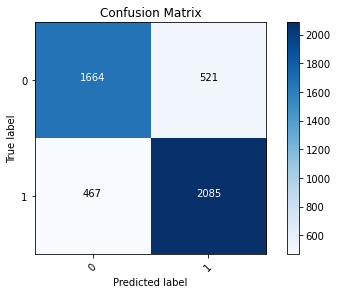

In [ ]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],
                      title='Confusion Matrix')
plt.show()

# Problems faced and next steps forward. 
A major obstacle we faced was scraping our data as well as choosing the hyperparamters for our model. For wrestling there is not a ton of data out there so our features were drawn from one website. Looking forward it seems like we could make better models if we knew what types of points were scored by wrestlers. For example, if we knew how many takedowns a wrestler had or how many near fall points they scored this would lead to additional and possibly better features.